# BIS 634 Final Project
## About the Dataset  
Customer churn prediction is detecting which customers are likely to stop subscriptions, products or services. Early detection of churn is crucial for banks as it helps management target those customers with promotions. Also, churn prediction provides insights into which factors are important to retain customers.   
<br>
For the final projet, I will use a dataset from the American Bank of Commerce. The 'Bank Customer Churn Dataset' contains 12 columns and 10000 rows (accounts).  
 
Feature Description: 
- customer_id : Account Number
- credit_score : Credit Score
- country : Country of Residence
- gender: Sex
- age : Age
- tenure : How many years customer had the bank account in ABC Bank
- balance : Account Balance
- products_number : Number of Products from bank
- credit_card : Does this customer have a credit card?
- active_member : Is the customer an active member of the bank?
- estimated_salary : Salary of Account holder
- churn : Churn Status (1 if the client has left the bank during some period or 0 if he/she has not)

## Data Resources and FAIRness  
I downloaded the dataset in .csv format from Kaggle. The dataset is from a public repository. The owner of the dataset is Gaurav Topre. There is no information about license. 
**FAIR**ness
- **F**indability : The data and metadata can easily be found by everyone on Kaggle through 'Bank Customer Churn Dataset'. 
- **A**ccessibility : The data and metadata is open and free from a public repository - no permission is needed to download the data from Kaggle. 
- **I**nteroperability : The data is stored in a .csv format. 
- **R**eusability : The data and metadata is well annotated. However, the license is not clear.  

## Data Exploration 
### Data Description and Data Cleaning

In [5]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
from collections import deque, Counter  
from sklearn import decomposition
from sklearn.model_selection import train_test_split
from sklearn import metrics
plt.style.use('seaborn-pastel')


In [6]:
# read and check data
df = pd.read_csv("static/Bank_Customer_Churn_Prediction.csv")
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
# Check data type, number of unique values, missing value
temp = {col: [df[col].dtype, df[col].nunique(), df[col].isnull().sum()] for col in df.columns}
temp_df = pd.DataFrame(temp)
temp_df.index = ['data type', 'unique values', 'missing value']
temp_df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
data type,int64,int64,object,object,int64,int64,float64,int64,int64,int64,float64,int64
unique values,10000,460,3,2,70,11,6382,4,2,2,9999,2
missing value,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
# Check for duplicated rows
df.duplicated().sum()

0

In [10]:
# change data type
df[["credit_card", "active_member"]] = df[["credit_card", "active_member"]].astype(object)
df[["credit_card", "active_member" , "churn"]].dtypes

credit_card      object
active_member    object
churn             int64
dtype: object

In [11]:
df['credit_card'].replace({1:'Yes', 0:'No'}, inplace=True)
df['active_member'].replace({1:'Yes', 0:'No'}, inplace=True)
df['churn'].replace({1:'churned', 0:'not churned'}, inplace=True)
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,churned
1,15647311,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,not churned
2,15619304,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,churned
3,15701354,699,France,Female,39,1,0.00,2,No,No,93826.63,not churned
4,15737888,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,not churned


In [12]:
df = df.drop('customer_id', 1)

## Exploratory Data Analysis

### Univariate Analysis

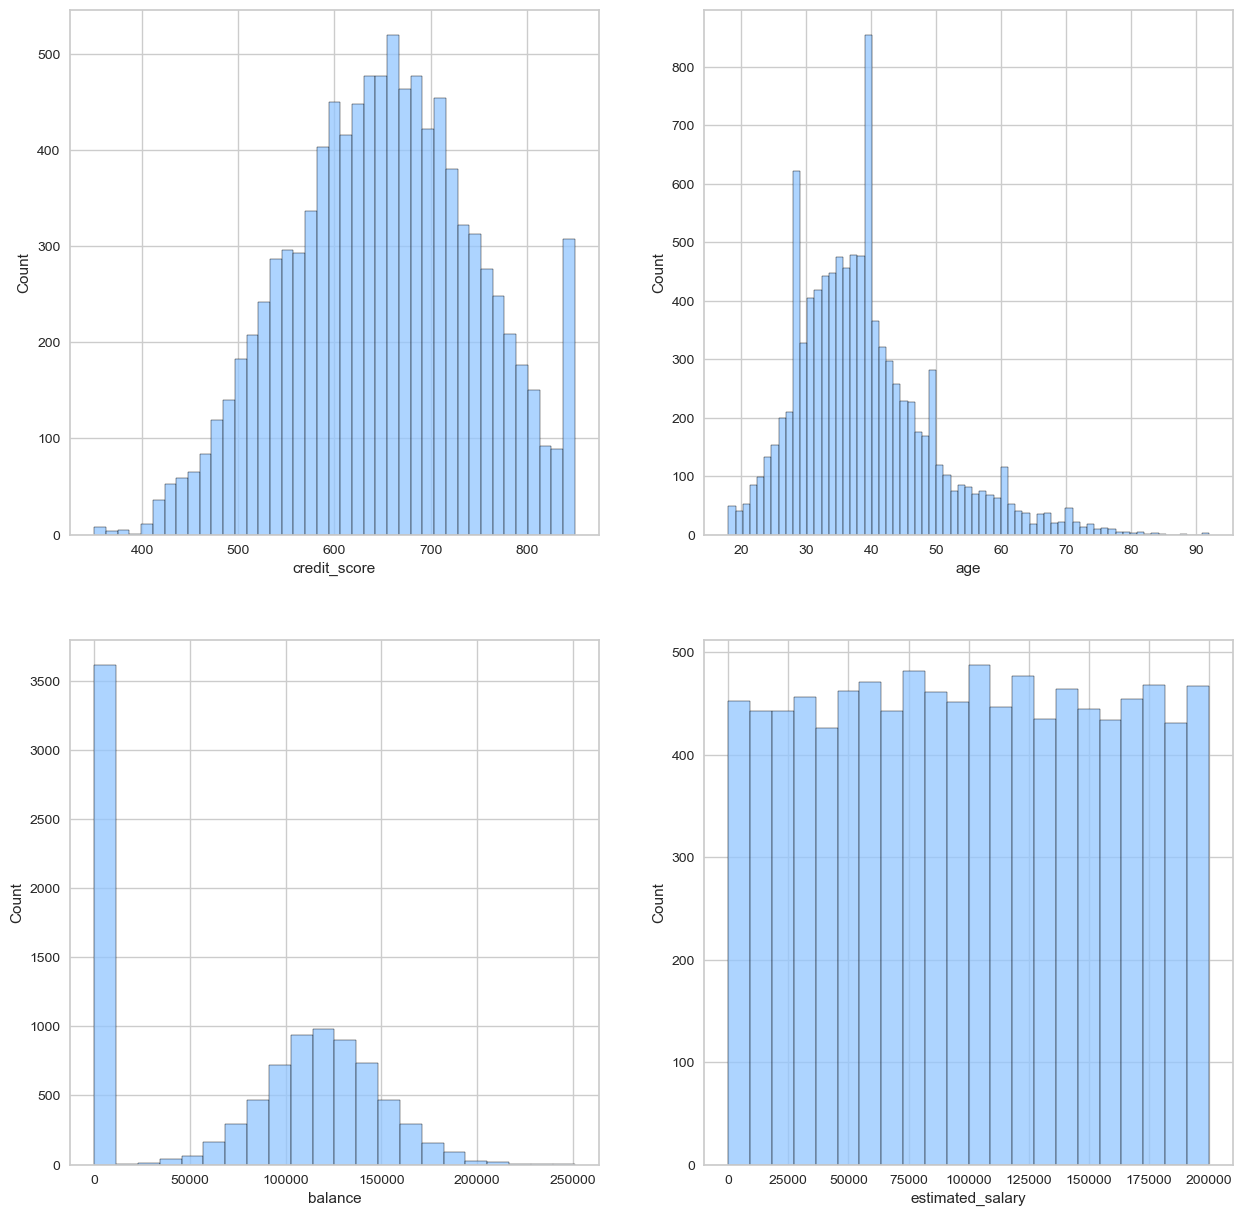

In [13]:
# Numerical Variables

plt.figure(figsize = (15,15))

#sns.set(font_scale =1.2, color_codes = True)

plt.subplot(2,2,1)
sns.histplot(df, x = 'credit_score')

plt.subplot(2,2,2)
sns.histplot(df, x = 'age')

plt.subplot(2,2,3)
sns.histplot(df, x = 'balance')

plt.subplot(2,2,4)
sns.histplot(df, x = 'estimated_salary');

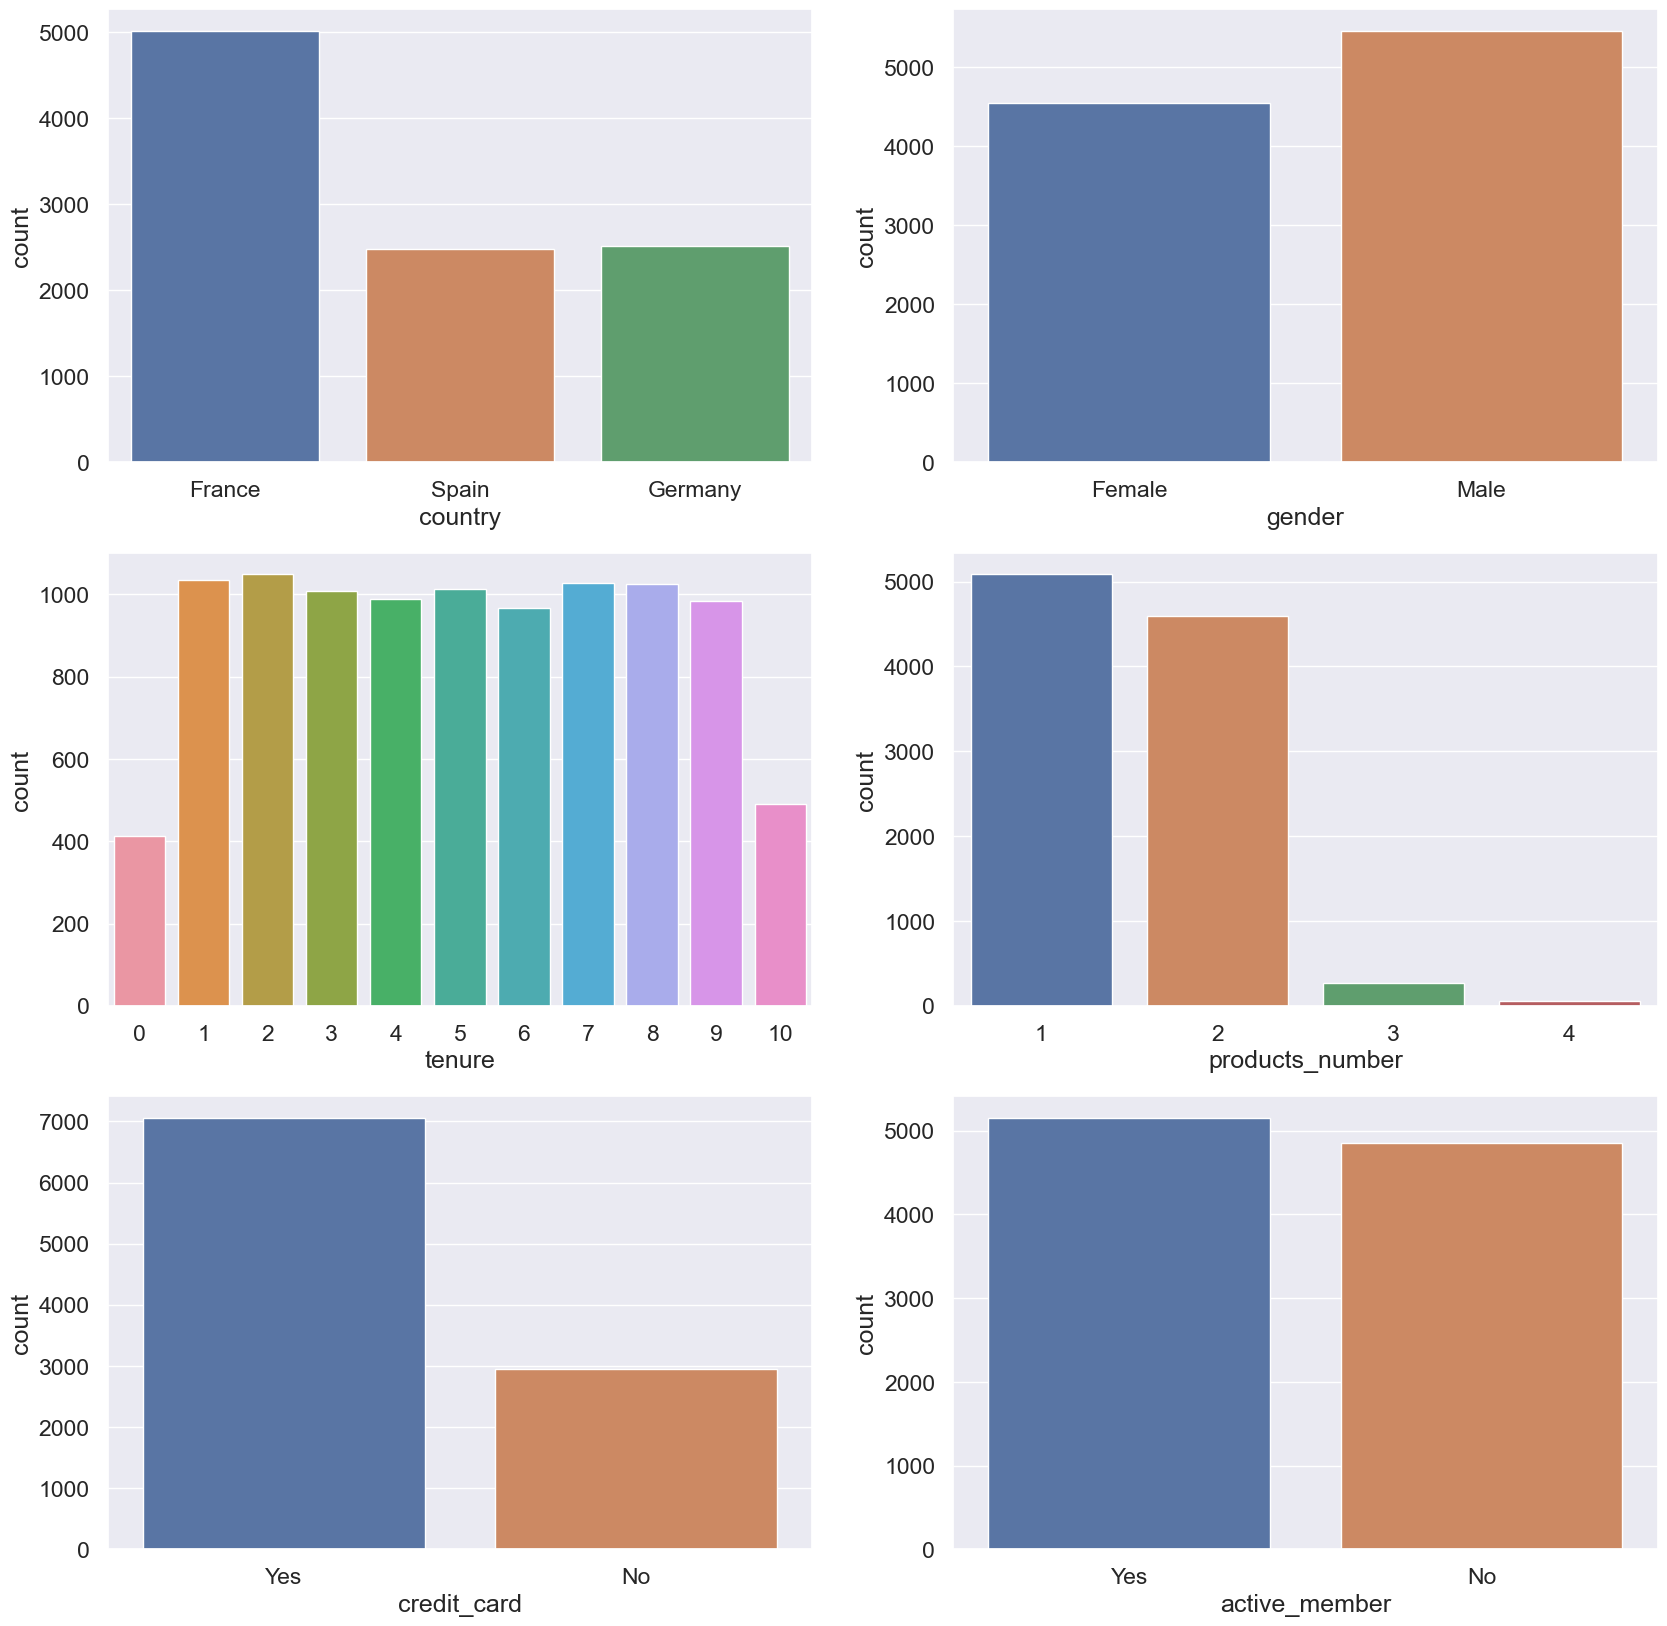

In [14]:
# categorical variables

plt.figure(figsize = (20,20))
sns.set(font_scale=1.5)

plt.subplot(3,2,1)
sns.countplot(x = 'country', data = df)

plt.subplot(3,2,2)
sns.countplot(x = 'gender', data = df)

plt.subplot(3,2,3)
sns.countplot(x = 'tenure', data = df)

plt.subplot(3,2,4)
sns.countplot(x = 'products_number', data = df)

plt.subplot(3,2,5)
sns.countplot(x = 'credit_card',  data = df)

plt.subplot(3,2,6)
sns.countplot(x = 'active_member',  data = df);

#plt.subplot(4,2,7)
#sns.countplot(x = 'churn', data = df);


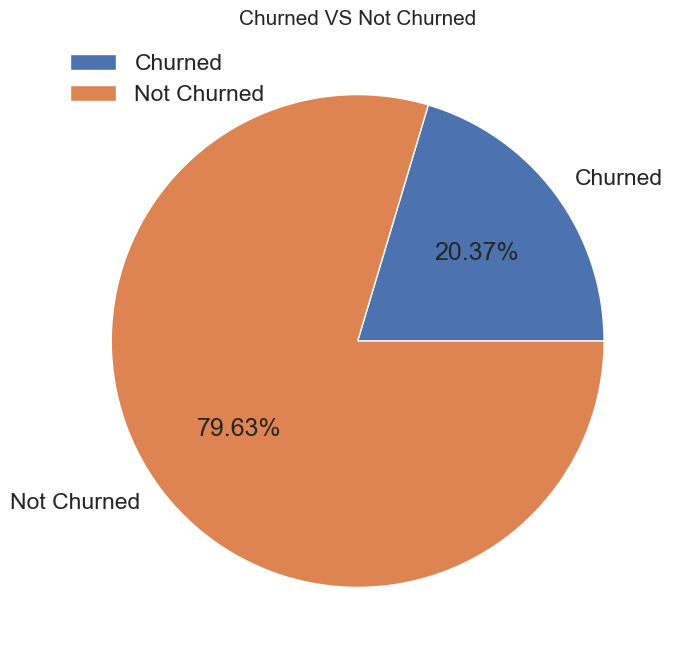

In [15]:
sizes = [df.churn[df['churn']=='churned'].count(), df.churn[df['churn']=='not churned'].count()]
labels = ['Churned', 'Not Churned']
figure, axes = plt.subplots(figsize=(10, 8))
axes.pie(sizes, labels=labels, autopct = '%1.2f%%')
plt.legend()
plt.title("Churned VS Not Churned", size = 15)
plt.show()

### Bivariate Analysis

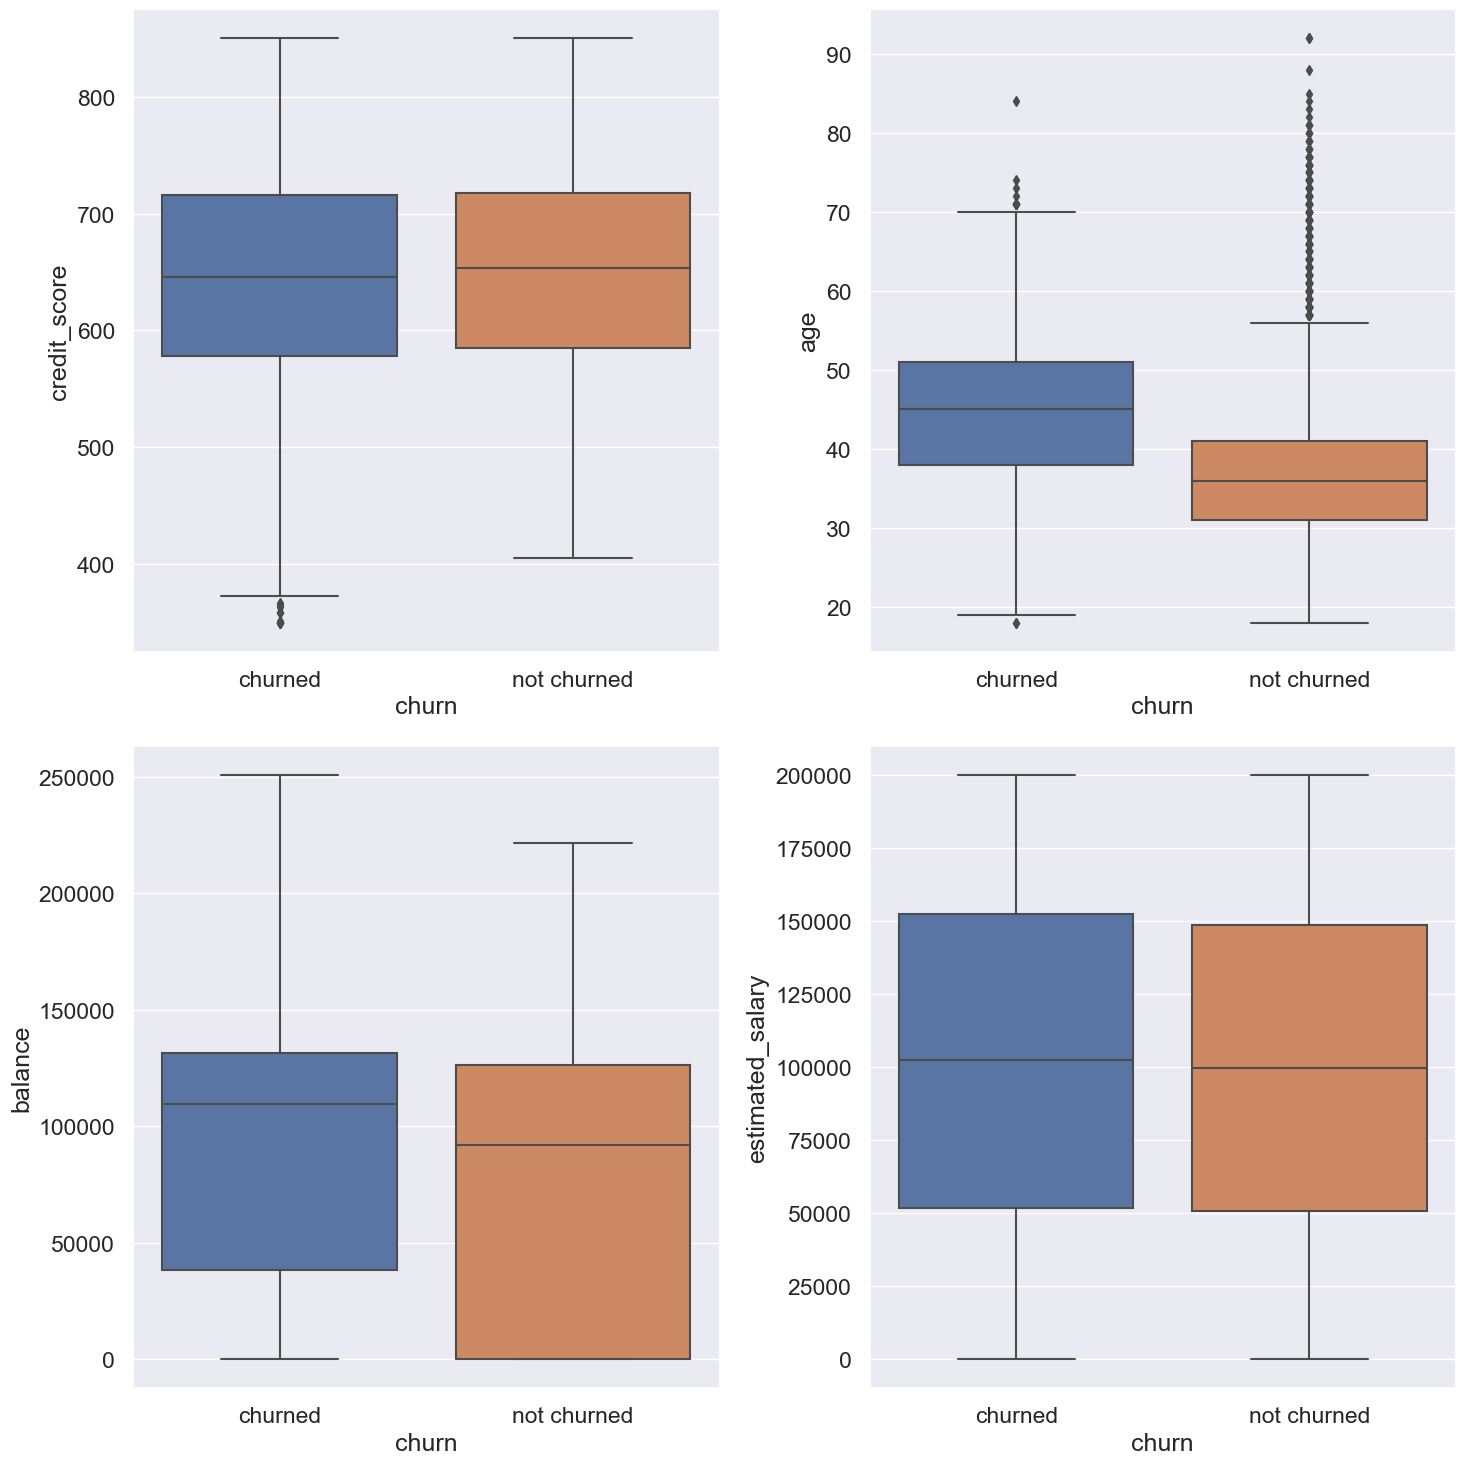

In [16]:
plt.figure(figsize = (15,15))

#sns.set(font_scale =1.2, color_codes = True)

plt.subplot(2,2,1)
sns.boxplot(data=df, x='churn', y='credit_score')

plt.subplot(2,2,2)
sns.boxplot(data=df, x='churn', y='age')

plt.subplot(2,2,3)
sns.boxplot(data=df, x='churn', y='balance')

plt.subplot(2,2,4)
sns.boxplot(data=df, x='churn', y='estimated_salary')

#plt.suptitle('Which numerical features have an effect on churn?')
plt.tight_layout()

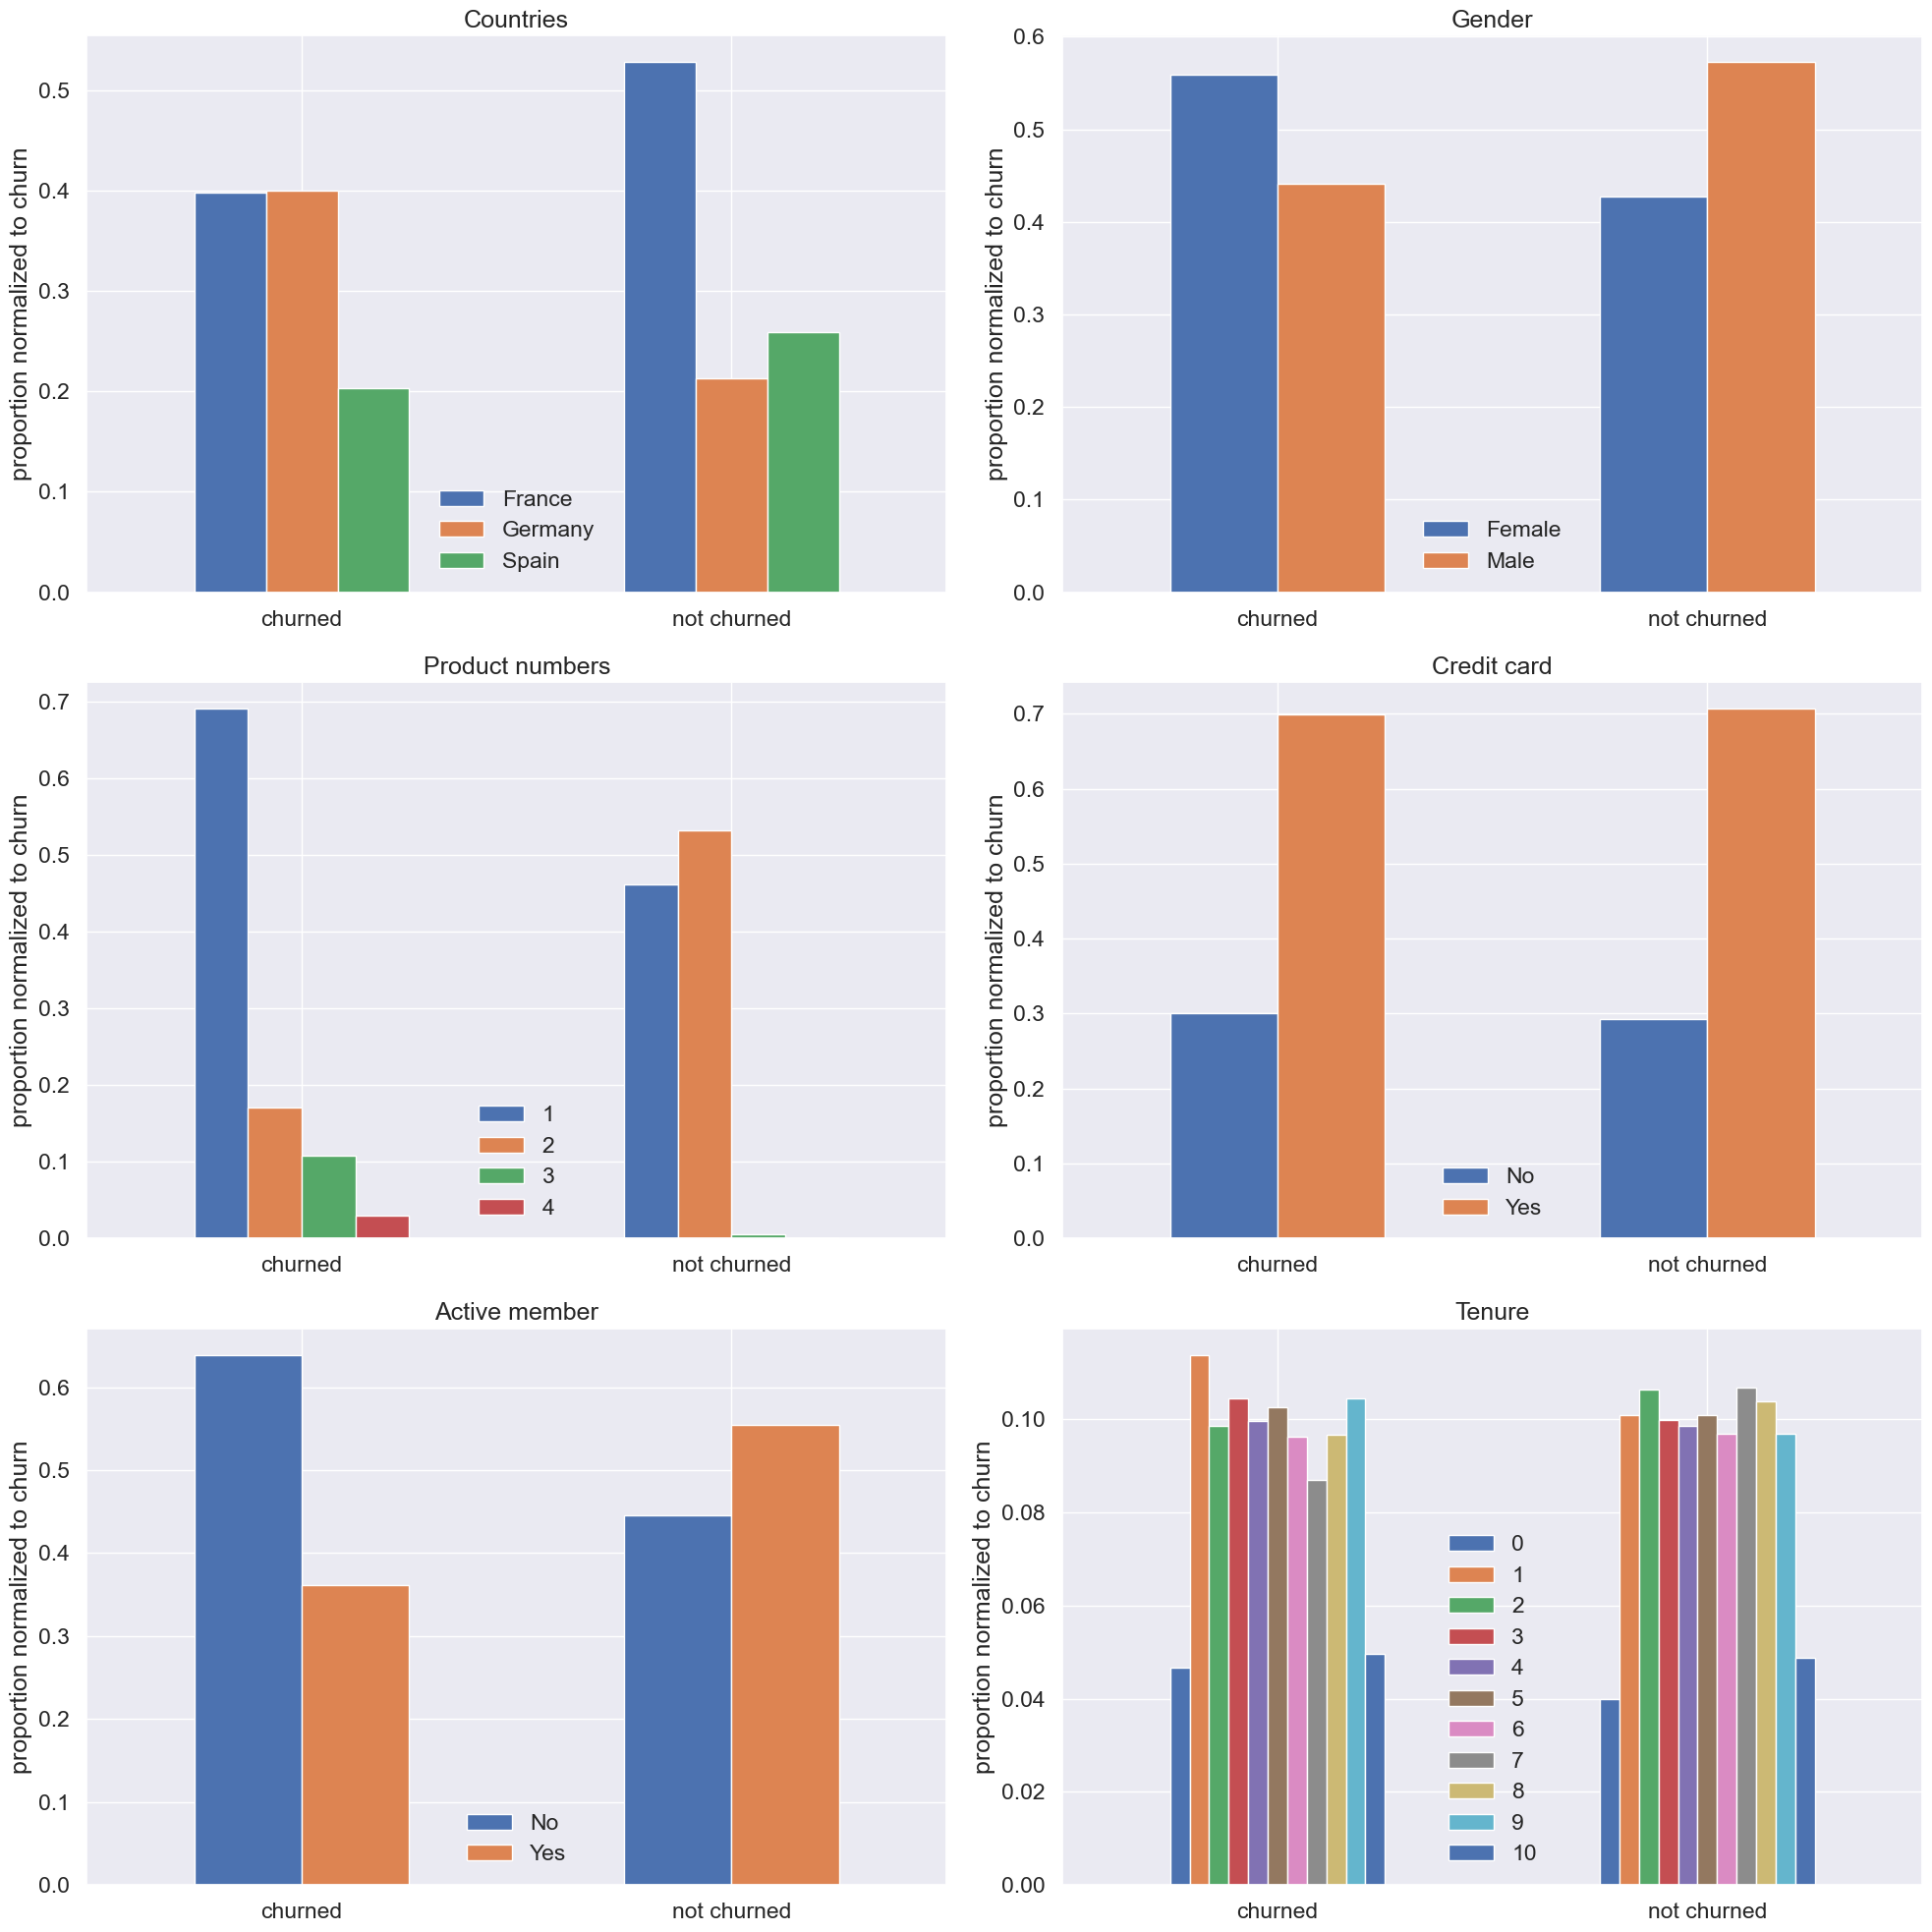

In [17]:
fig,ax = plt.subplots(nrows=3, ncols=2, figsize=[20,20])

pd.crosstab(index=df.churn, columns=df.country, normalize='index').plot(kind='bar', rot=0, legend=True, ax=ax[0,0], xlabel='', ylabel='proportion normalized to churn', title='Countries');
ax[0,0].legend(loc ='lower center')

pd.crosstab(index=df.churn, columns=df.gender, normalize='index').plot(kind='bar', rot=0, legend=True, ax=ax[0,1], xlabel='', ylabel='proportion normalized to churn', title='Gender');
ax[0,1].legend(loc ='lower center')

pd.crosstab(index=df.churn, columns=df.products_number, normalize='index').plot(kind='bar',rot=0, legend=True, ax=ax[1,0], xlabel='', ylabel='proportion normalized to churn', title='Product numbers');
ax[1,0].legend(loc ='lower center')

pd.crosstab(index=df.churn, columns=df.credit_card, normalize='index').plot(kind='bar',rot=0, legend=True, ax=ax[1,1], xlabel='', ylabel='proportion normalized to churn',title='Credit card');
ax[1,1].legend(loc ='lower center')

pd.crosstab(index=df.churn, columns=df.active_member, normalize='index').plot(kind='bar', rot=0, legend=True, ax=ax[2,0], xlabel='', ylabel='proportion normalized to churn', title='Active member');
ax[2,0].legend(loc ='lower center')

pd.crosstab(index=df.churn, columns=df.tenure, normalize='index').plot(kind='bar', rot=0, legend=True, ax=ax[2,1], xlabel='', ylabel='proportion normalized to churn', title='Tenure');
ax[2,1].legend(loc ='lower center')

#fig.suptitle('Which categorical features have an effect on churn?')
plt.tight_layout()

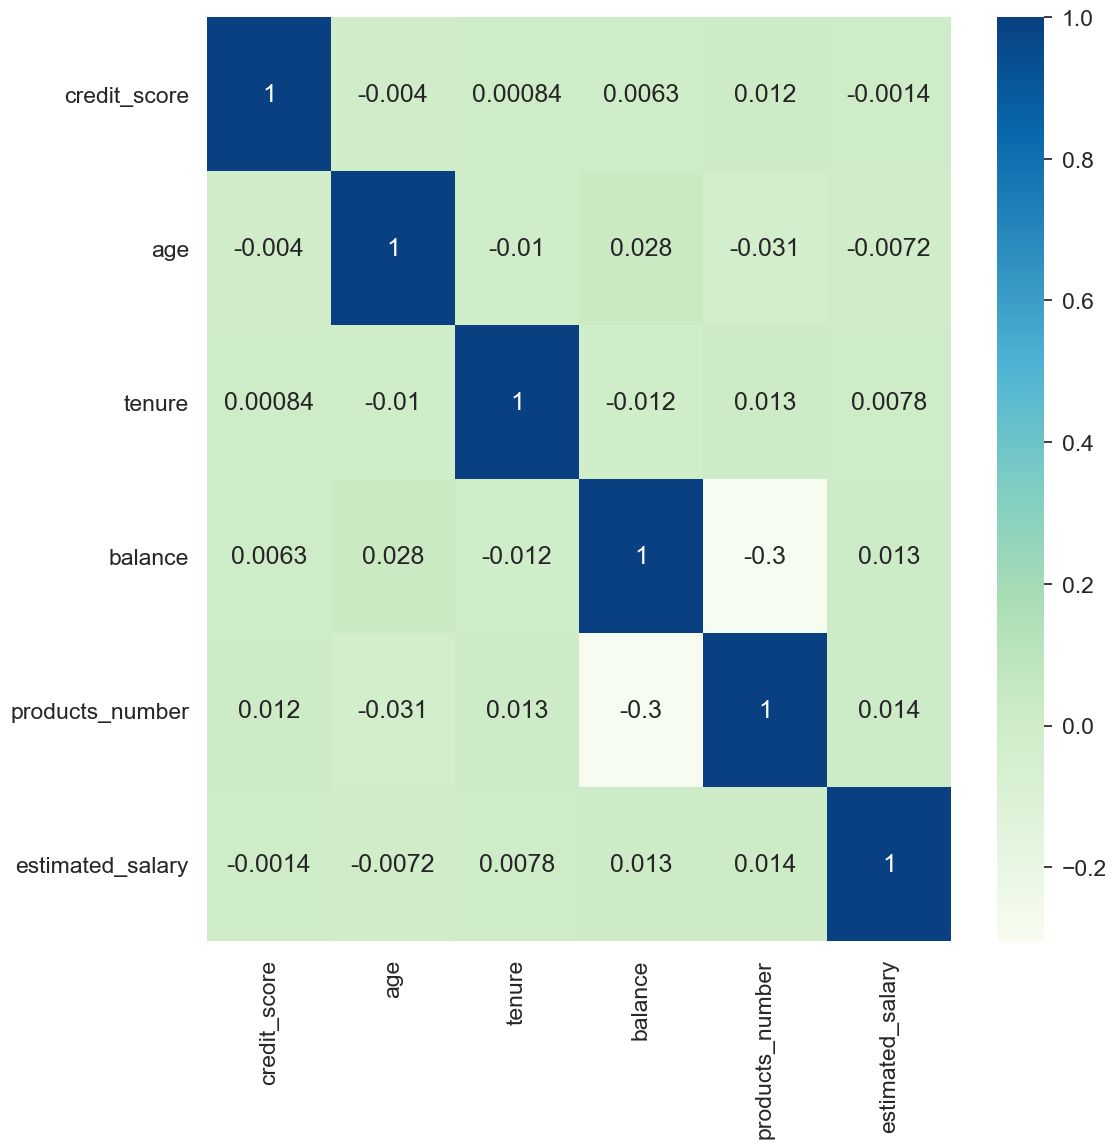

In [18]:
plt.figure(figsize=(12,12))
sns.heatmap(data=df.corr(), annot=True,cmap = "GnBu");

## KNN

In [19]:

df2 = df[['age', 'tenure', 'balance', 'products_number', 'estimated_salary', 'churn']]
my_cols = df2.columns[:-1]

for column in my_cols:
    df2[column] = (df2[column] - df2[column].mean())/df2[column].std()

df2.head()

,age,tenure,balance,products_number,estimated_salary,churn
0,0.293503,-1.041708,-1.225786,-0.911538,0.021885,churned
1,0.198154,-1.387468,0.117344,-0.911538,0.216523,not churned
2,0.293503,1.032856,1.332987,2.526930,0.240675,churned
3,0.007456,-1.387468,-1.225786,0.807696,-0.108912,not churned
4,0.388852,-1.041708,0.785689,-0.911538,-0.365258,not churned


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#train_data, test_data = train_test_split(df, test_size = 0.3, random_state = 10)

In [21]:
df[["credit_card", "active_member" , "churn"]] = df[["credit_card", "active_member" , "churn"]].astype(object)
categorical_col=[col for col in df if df[col].dtype=="object" ]

In [22]:
# encode the categorical variables 
def label_endocing(col_name):
    label_encoder = preprocessing.LabelEncoder()
    df[col_name]= label_encoder.fit_transform(df[col_name])
    df[col_name].unique()

In [23]:
for col in categorical_col:
    label_endocing(col)
scaler = StandardScaler()
scaler.fit(df.drop('churn',axis = 1))

StandardScaler()

In [24]:
scaled_features = scaler.transform(df.drop('churn',axis = 1))
feature_df = pd.DataFrame(scaled_features,columns = df.columns[:-1])
X = feature_df
y = df['churn']
X.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,-0.326221,-0.901886,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.440036,1.515067,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.536794,-0.901886,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,0.501521,-0.901886,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,2.063884,1.515067,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

Minimum error:- 0.172 at K = 23


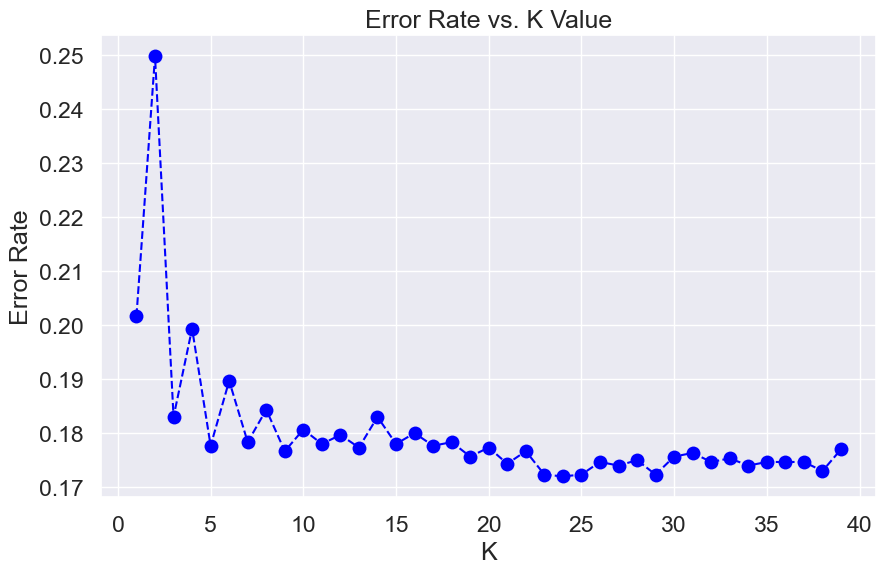

In [26]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate,color='blue', linestyle='dashed', 
         marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [27]:
def knn_model(k):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)*100
    print(f"When k = {k}:")
    cmat = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cmat, columns = ['Not Churn', 'Churn'], index=['Not Churn', 'Churn'])
    print(f"Accuracy = {accuracy}%")
    fig = px.imshow(cm_df,
                text_auto=True,
                color_continuous_scale='agsunset',
                labels=dict(x="Predicted label ", y="True label"),
                x=['Not Churn', 'Churn'],
                y=['Not Churn', 'Churn']
               )
    fig.update_layout(
    title=f'Confusion matrix for K = {k} :',
    width=800,
    height=800,
    )
    fig.show()


In [28]:
knn_model(23)

When k = 23:
Accuracy = 82.76666666666667%


# SVM

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# defining parameter range
param_grid = {'C': [0.1, 1, 10], 
              'kernel': ['linear', 'rbf', 'poly']} 
  
grid = GridSearchCV(svm.SVC(), param_grid, verbose = 10)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START C=0.1, kernel=linear........................................
[CV 1/5; 1/9] END .........C=0.1, kernel=linear;, score=0.798 total time=   0.5s
[CV 2/5; 1/9] START C=0.1, kernel=linear........................................
[CV 2/5; 1/9] END .........C=0.1, kernel=linear;, score=0.798 total time=   0.5s
[CV 3/5; 1/9] START C=0.1, kernel=linear........................................
[CV 3/5; 1/9] END .........C=0.1, kernel=linear;, score=0.798 total time=   0.5s
[CV 4/5; 1/9] START C=0.1, kernel=linear........................................
[CV 4/5; 1/9] END .........C=0.1, kernel=linear;, score=0.797 total time=   0.5s
[CV 5/5; 1/9] START C=0.1, kernel=linear........................................
[CV 5/5; 1/9] END .........C=0.1, kernel=linear;, score=0.797 total time=   0.5s
[CV 1/5; 2/9] START C=0.1, kernel=rbf...........................................
[CV 1/5; 2/9] END ............C=0.1, kernel=rbf;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=10)

In [60]:

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'kernel': 'rbf'}
SVC(C=1)


In [29]:
def svm_model(reg):
    clf = svm.SVC(kernel='rbf', C=reg)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)*100
    print(f"When C = {reg} :")
    cmat = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cmat, columns = ['Not Churn', 'Churn'], index=['Not Churn', 'Churn'])
    print(f"Accuracy = {accuracy}%")
    fig = px.imshow(cm_df,
                text_auto=True,
                color_continuous_scale='agsunset',
                labels=dict(x="Predicted label ", y="True label"),
                x=['Not Churn', 'Churn'],
                y=['Not Churn', 'Churn']
               )
    fig.update_layout(
    title=f'Confusion matrix for C = {reg} :',
    width=800,
    height=800,
    )
    fig.show()

In [30]:
svm_model(reg=1)

When C = 1 :
Accuracy = 84.86666666666667%
